In [6]:
from ionChain import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
ic = ionChain(2)

In [17]:
amp = ic.optimize_amp(0, 1, np.pi/4, 3e-4, 9)

(9, 5) (5,) -1965.0770802383554


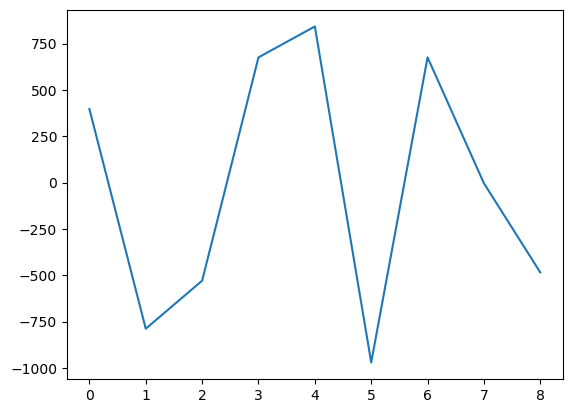

In [18]:
plt.plot(np.arange(len(amp)), amp)